In [149]:
import os
import time
import nest_asyncio
from typing import List
from dotenv import load_dotenv

from llama_parse import LlamaParse
from llama_index.core.schema import ImageDocument, TextNode
from llama_index.embeddings.cohere import CohereEmbedding
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index.core import Settings
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import StorageContext
import qdrant_client
from llama_index.core import SimpleDirectoryReader


# Load environment variables
load_dotenv()
nest_asyncio.apply()

# Set API keys
COHERE_API_KEY = os.getenv("COHERE_API_KEY")
ANTHROPIC_API_KEY = os.getenv("ANTHROPIC_API_KEY")
LLAMA_CLOUD_API_KEY = os.getenv("LLAMA_CLOUD_API_KEY")
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

# Define file paths
FILE_NAME = "furniture.docx"
IMAGES_DOWNLOAD_PATH = "parsed_data"

# Initialize the LlamaParse parser
parser = LlamaParse(
    api_key=LLAMA_CLOUD_API_KEY,
    result_type="markdown",
)

# Parse document and extract JSON data
json_objs = parser.get_json_result(FILE_NAME)
json_list = json_objs[0]["pages"]

# Extract text nodes
def get_text_nodes(json_list: List[dict]) -> List[TextNode]:
    return [TextNode(text=page["text"], metadata={"page": page["page"]}) for page in json_list]

text_nodes = get_text_nodes(json_list)

# Extract image nodes
def get_image_nodes(json_objs: List[dict], download_path: str) -> List[ImageDocument]:
    image_dicts = parser.get_images(json_objs, download_path=download_path)
    return [ImageDocument(image_path=image_dict["path"]) for image_dict in image_dicts]

image_documents = get_image_nodes(json_objs, IMAGES_DOWNLOAD_PATH)

# Save extracted text fields to a file
def save_texts_to_file(text_nodes, file_path):
    texts = [node.text for node in text_nodes]
    all_text = "\n\n".join(texts)
    with open(file_path, "w", encoding="utf-8") as file:
        file.write(all_text)

# Define file path for extracted texts
file_path = "extracted_texts.txt"
save_texts_to_file(text_nodes, file_path)
tsec = 30
# Define custom embedding class with a fixed delay after each embedding
class DelayCohereEmbedding(CohereEmbedding):
    def get_image_embedding_batch(self, img_file_paths, show_progress=False):
        embeddings = []
        for img_file_path in img_file_paths:
            embedding = self.get_image_embedding(img_file_path)
            embeddings.append(embedding)
            print(f"sleeping for {tsec} seconds")
            time.sleep(tsec)  # Add a fixed delay after each embedding
        return embeddings

# Set the custom embedding model in settings
Settings.embed_model = DelayCohereEmbedding(
    api_key=COHERE_API_KEY,
    model_name="embed-english-v3.0"
)

# Load documents from directory
documents = SimpleDirectoryReader("parsed_data/", 
                                  required_exts=[".jpg", ".png", ".txt"], 
                                  exclude_hidden=False).load_data()

# Set up Qdrant vector store
client = qdrant_client.QdrantClient(path="furniture_db")
text_store = QdrantVectorStore(client=client, collection_name="text_collection")
image_store = QdrantVectorStore(client=client, collection_name="image_collection")
storage_context = StorageContext.from_defaults(vector_store=text_store, image_store=image_store)

# Create the multimodal vector index 
index = MultiModalVectorStoreIndex.from_documents(
    documents,
    storage_context=storage_context,
    image_embed_model=Settings.embed_model,
)

# Ready for query setup
retriever_engine = index.as_retriever(similarity_top_k=4, image_similarity_top_k=4)
print("Index created and retriever engine is ready.")


Started parsing the file under job_id b87214a6-a4b5-4937-8e66-7d009b20500e
> Image for page 1: [{'name': 'img_p0_1.png', 'height': 270, 'width': 270, 'x': 62.1, 'y': 343.950763779528, 'original_width': 433, 'original_height': 433}, {'name': 'img_p0_2.png', 'height': 270, 'width': 270, 'x': 222.55, 'y': 343.950763779528, 'original_width': 433, 'original_height': 433}, {'name': 'img_p0_3.png', 'height': 270, 'width': 270, 'x': 383, 'y': 343.950763779528, 'original_width': 433, 'original_height': 433}, {'name': 'img_p0_4.png', 'height': 270, 'width': 270, 'x': 62.1, 'y': 577.500763779528, 'original_width': 433, 'original_height': 433}, {'name': 'img_p0_5.png', 'height': 270, 'width': 270, 'x': 222.55, 'y': 577.500763779528, 'original_width': 433, 'original_height': 433}, {'name': 'img_p0_6.png', 'height': 270, 'width': 270, 'x': 383, 'y': 577.500763779528, 'original_width': 433, 'original_height': 433}]
> Image for page 2: [{'name': 'img_p1_1.png', 'height': 270, 'width': 270, 'x': 62.1, 

sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds
sleeping for 30 seconds


Index created and retriever engine is ready.


**Node ID:** 979b22ec-333a-46b4-a800-b34a6211a669<br>**Similarity:** 0.5395075650022401<br>**Text:** Welcome to ABC Furniture: Where Comfort Meets Style
At ABC Furniture, we believe that furniture is more than just functional; it's an
expression of your personal style and a key element in creati...<br>

**Node ID:** 2099ebb2-add2-4ed2-918a-b96c50b3c630<br>**Similarity:** 0.3655350647183971<br>**Text:** bottom, ideal for
                                    professional storage.
Compact Office Shelf: An
open-compartment shelf
ideal for small workspaces
and easy organization.

              S...<br>

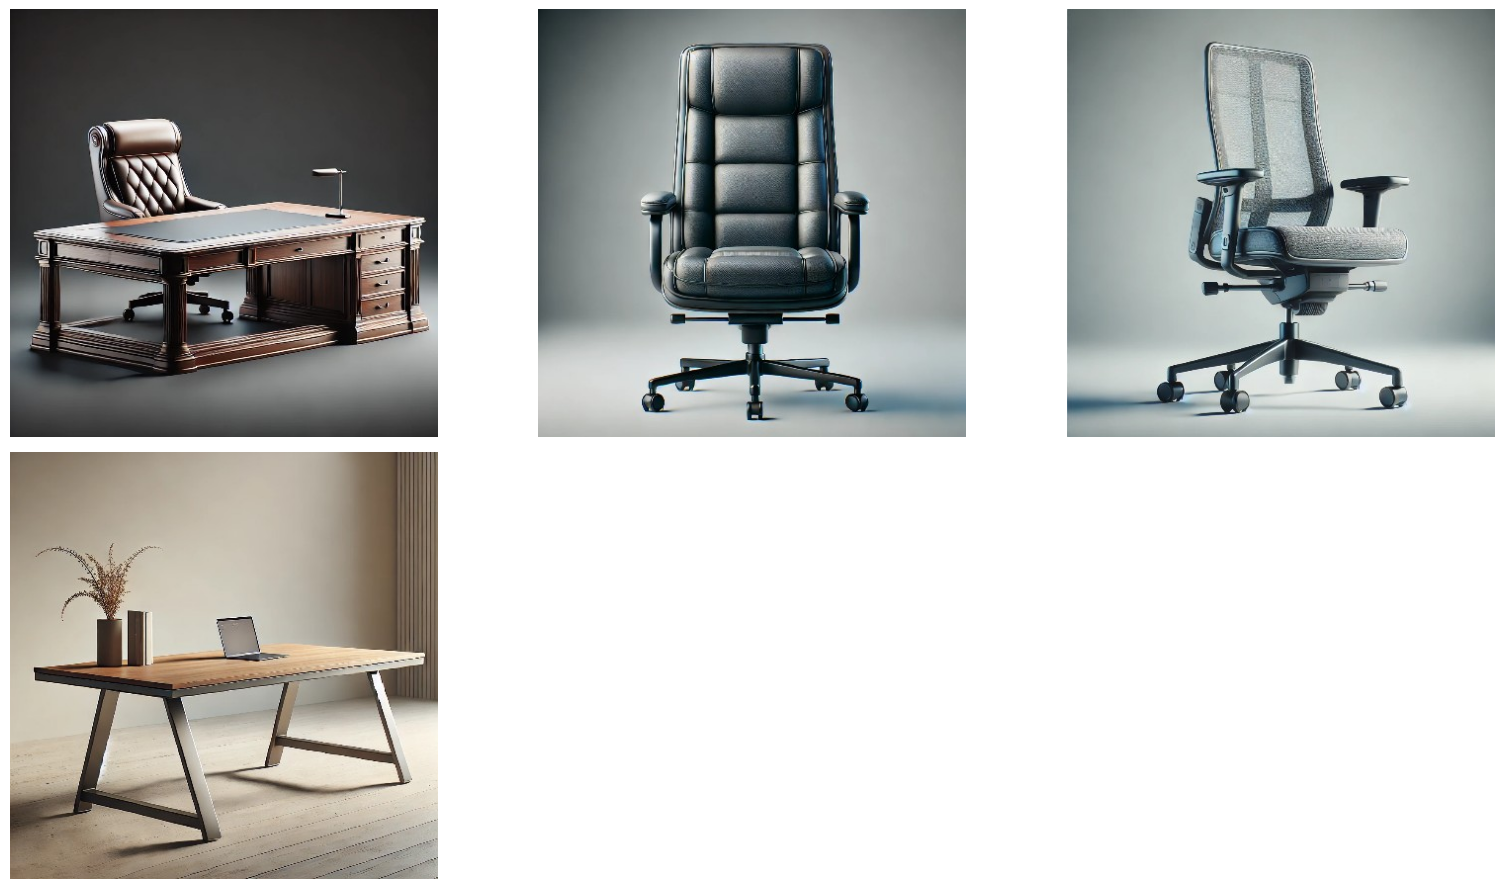

In [909]:
###test retriever
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode
import matplotlib.pyplot as plt
from PIL import Image

def display_images(file_list, grid_rows=2, grid_cols=3, limit=9):
    """
    Display images from a list of file paths in a grid.
    Parameters:
        - file_list: List of image file paths.
        - grid_rows: Number of rows in the grid.
        - grid_cols: Number of columns in the grid.
        - limit: Maximum number of images to display.
    """
    plt.figure(figsize=(16, 9))
    count = 0
    for idx, file_path in enumerate(file_list):
        if os.path.isfile(file_path) and count < limit:
            img = Image.open(file_path)
            plt.subplot(grid_rows, grid_cols, count + 1)
            plt.imshow(img)
            plt.axis('off')
            count += 1
    plt.tight_layout()
    plt.show()

query = "Show me an executive-style office table and a big office chair"
retrieval_results = retriever_engine.retrieve(query)

retrieved_image = []
for res_node in retrieval_results:
    if isinstance(res_node.node, ImageNode):
        retrieved_image.append(res_node.node.metadata["file_path"])
    else:
        display_source_node(res_node, source_length=200)

display_images(retrieved_image)

In [679]:
import logging
from llama_index.core.schema import NodeWithScore, ImageNode, MetadataMode

# Define the template with explicit instructions
qa_tmpl_str = (
    "Context information is below.\n"
    "---------------------\n"
    "{context_str}\n"
    "---------------------\n"
    "Using the provided context and images (not prior knowledge), "
    "answer the query. Include only the image paths of images that directly relate to the answer.\n"
    "Your response should be formatted as follows:\n"
    "Result: [Provide answer based on context]\n"
    "Relevant Image Paths: array of image paths of relevant images only separated by comma\n"
    "Query: {query_str}\n"
    "Answer: "
)

qa_tmpl = PromptTemplate(qa_tmpl_str)
# Initialize multimodal LLM
multimodal_llm = OpenAIMultiModal(model="gpt-4o", temperature=0.0, max_tokens=1024)
# Setup the query engine with retriever and prompt template
query_engine = index.as_query_engine(
    llm=multimodal_llm,
    text_qa_template=qa_tmpl,
    retreiver=retriever_engine
)

**Query**: Show me an executive-style office table and a big office chair.

Result: Executive-style office table and big office chair are described as follows:

- **Executive Office Table**: A large office table with a dark wood finish, providing ample workspace and a formal look.
- **Executive Office Chair**: A high-back office chair with padded armrests and leather upholstery, suited for a professional setting.

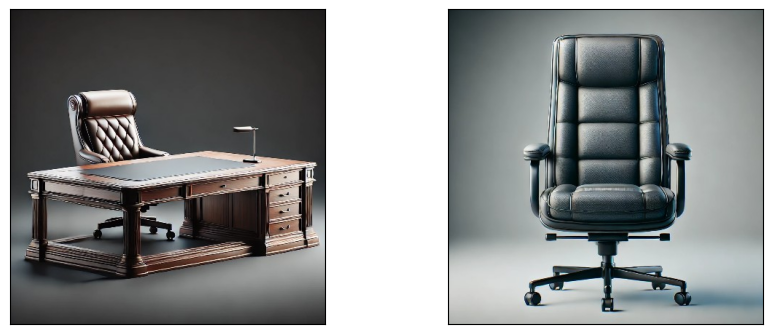

In [688]:
from IPython.display import display, Markdown

# Run the query
query = "Show me an executive-style office table and a big office chair."
retrieval_results = retriever_engine.retrieve(query)

# Extract the underlying nodes
nodes = [node.node for node in retrieval_results]

# Create ImageNode instances with valid paths and metadata
image_nodes = []
for n in nodes:
    if "file_path" in n.metadata and n.metadata["file_path"].lower().endswith(('.png', '.jpg')):
        # Add the ImageNode with only path and mimetype as expected by LLM
        image_node = ImageNode(
            image_path=n.metadata["file_path"],
            image_mimetype="image/jpeg" if n.metadata["file_path"].lower().endswith('.jpg') else "image/png"
        )
        image_nodes.append(NodeWithScore(node=image_node))
        logging.info(f"ImageNode created for path: {n.metadata['file_path']}")

logging.info(f"Total ImageNodes prepared for LLM: {len(image_nodes)}")

# Create the context string for the prompt
ctx_str = "\n\n".join(
    [n.get_content(metadata_mode=MetadataMode.LLM).strip() for n in nodes]
)

# Format the prompt
fmt_prompt = qa_tmpl.format(context_str=ctx_str, query_str=query)

# Use the multimodal LLM to generate a response
llm_response = multimodal_llm.complete(
    prompt=fmt_prompt,
    image_documents=[image_node.node for image_node in image_nodes],  # Pass only ImageNodes with paths
    max_tokens=300
)

# Convert response to text and process it
response_text = llm_response.text  # Extract the actual text content from the LLM response

# Extract the image paths after "Relevant Image Paths:"
image_paths = re.findall(r'Relevant Image Paths:\s*(.*)', response_text)
if image_paths:
    # Split the paths by comma if multiple paths are present and strip any extra whitespace
    image_paths = [path.strip() for path in image_paths[0].split(",")]

# Filter out the "Relevant Image Paths" part from the displayed response
filtered_response = re.sub(r'Relevant Image Paths:.*', '', response_text).strip()

display(Markdown(f"**Query**: {query}"))

# Print the filtered response without image paths
display(Markdown(f"{filtered_response}"))

if image_paths!=['']:
    # Plot images using the paths collected in image_paths array
    display_images(image_paths)

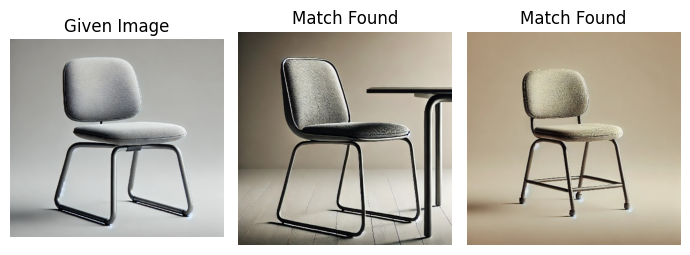

In [734]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def display_images(input_image_path, matched_image_paths):
    """
    Plot the input image alongside matching images with appropriate labels.
    """
    # Total images to show (input + first match)
    total_images = 1 + len(matched_image_paths)

    # Define the figure size
    plt.figure(figsize=(7, 7))

    # Display the input image
    plt.subplot(1, total_images, 1)
    if os.path.isfile(input_image_path):
        input_image = Image.open(input_image_path)
        plt.imshow(input_image)
        plt.title("Given Image")
        plt.axis("off")

    # Display matching images
    for idx, img_path in enumerate(matched_image_paths):
        if os.path.isfile(img_path):
            matched_image = Image.open(img_path)
            plt.subplot(1, total_images, idx + 2)
            plt.imshow(matched_image)
            plt.title("Match Found")
            plt.axis("off")

    plt.tight_layout()
    plt.show()

# Sample usage with specified paths
input_image_path = 'trial.png' #provide an input image

retrieval_results = retriever_engine.image_to_image_retrieve(input_image_path)
retrieved_images = []
for res in retrieval_results:
    retrieved_images.append(res.node.metadata["file_path"])

# Call the function to display images side by side
display_images(input_image_path, retrieved_images[:2])



In [846]:
##Cohere's Embeddings and semantic Search as mentioned in the article
import cohere
import numpy as np
import re
import pandas as pd
from tqdm import tqdm
from datasets import load_dataset
import umap
import altair as alt
from sklearn.metrics.pairwise import cosine_similarity
import warnings
from IPython.display import display, Markdown
import faiss
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

# Normalize embeddings (optional but recommended for cosine similarity)
embeddings = normalize(np.array(embeddings))

# Create FAISS index
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)  # L2 distance, can use IndexFlatIP for inner product (cosine similarity)
index.add(embeddings)  # Add embeddings to the FAISS index

# Embed the query
query = "Which is the largest European country?"
query_embedding = co.embed(texts=[query], model="embed-english-v3.0", input_type="search_document").embeddings[0]
query_embedding = normalize(np.array([query_embedding]))  # Normalize query embedding

# Search for nearest neighbors
k = 5  # Number of nearest neighbors
distances, indices = index.search(query_embedding, k)

# Format and display results
results = pd.DataFrame({
    'texts': [concepts[i] for i in indices[0]],
    'distance': distances[0]
})
display(Markdown(f"Query: {query}"))
# Convert DataFrame to markdown format
def print_markdown_results(df):
    markdown_text = f"Nearest neighbors:\n\n"
    markdown_text += "| Texts | Distance |\n"
    markdown_text += "|-------|----------|\n"
    for _, row in df.iterrows():
        markdown_text += f"| {row['texts']} | {row['distance']:.4f} |\n"
    display(Markdown(markdown_text))

# Display results in markdown
print_markdown_results(results)

Query: Which is the largest European country?

Nearest neighbors:

| Texts | Distance |
|-------|----------|
| France | 1.1536 |
| Germany | 1.2197 |
| India | 1.3132 |
| Australia | 1.3291 |
| Japan | 1.3306 |


In [898]:
#Visualization of the embeddings
import cohere
import umap
import altair as alt
import pandas as pd
import numpy as np

# Initialize Cohere client and generate text embeddings
co = cohere.Client(api_key=os.getenv("COHERE_API_KEY_2"))
embeddings = np.array(co.embed(texts=concepts, model="embed-english-v3.0", input_type="search_document").embeddings)

# Generate query embedding
query = "What is the largest European country?"
query_embedding = np.array(co.embed(texts=[query], model="embed-english-v3.0", input_type="search_document").embeddings[0])

# Combine embeddings for UMAP and dimensionality reduction
all_embeddings = np.vstack([embeddings, query_embedding])
reducer = umap.UMAP(n_neighbors=20, random_state=42)
umap_embeds = reducer.fit_transform(all_embeddings)

# Create DataFrame for main embeddings
df_explore = pd.DataFrame({
    'text': concepts,
    'Category': labels,
    'x': umap_embeds[:-1, 0],
    'y': umap_embeds[:-1, 1]
})

# Separate DataFrame for query
df_query = pd.DataFrame({
    'text': [query],
    'Category': ['Query'],
    'x': [umap_embeds[-1, 0]],
    'y': [umap_embeds[-1, 1]]
})

# Define a visually distinct color palette for categories
color_scheme = alt.Scale(
    domain=list(set(labels)) + ['Query'],
    range=['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B2', '#937860', '#DA8BC3', '#8C8C8C', '#CCB974', '#64B5CD', '#E24A33', 'red']
)

# Plot main embeddings with labels for each item and distinct colors
chart = alt.Chart(df_explore).mark_circle(size=60).encode(
    x=alt.X('x', scale=alt.Scale(zero=False)),
    y=alt.Y('y', scale=alt.Scale(zero=False)),
    color=alt.Color('Category', scale=color_scheme, legend=alt.Legend(title="Category")),
    tooltip=['text', 'Category']
).properties(
    width=900,
    height=600
)

# Add labels for each item
text_labels = chart.mark_text(
    align='left',
    dx=7,
    dy=-7,
    fontSize=14
).encode(
    text='text'
)

# Plot the query separately with bold, red label
query_chart = alt.Chart(df_query).mark_circle(size=100, color='red').encode(
    x='x',
    y='y',
    tooltip=['text']
) + alt.Chart(df_query).mark_text(
    align='left',
    dx=7,
    dy=-7,
    fontSize=14,
    fontWeight='bold',
    color='red'
).encode(
    text='text',
    x='x',
    y='y'
)

# Combine the charts
combined_chart = (chart + text_labels + query_chart).interactive()
combined_chart


alt.LayerChart(...)